Found 989 images belonging to 2 classes.
Found 246 images belonging to 2 classes.


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - accuracy: 0.5471 - loss: 1.4836 - val_accuracy: 0.8049 - val_loss: 0.5002
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 429ms/step - accuracy: 0.7859 - loss: 0.4654 - val_accuracy: 0.8537 - val_loss: 0.3046
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 449ms/step - accuracy: 0.9057 - loss: 0.2067 - val_accuracy: 0.8699 - val_loss: 0.3526
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 454ms/step - accuracy: 0.9380 - loss: 0.1948 - val_accuracy: 0.9228 - val_loss: 0.2244
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 431ms/step - accuracy: 0.9745 - loss: 0.0884 - val_accuracy: 0.9106 - val_loss: 0.2815
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 447ms/step - accuracy: 0.9853 - loss: 0.0543 - val_accuracy: 0.9065 - val_loss: 0.2779
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.9804 - loss: 0.0543 - val_accuracy: 0.9065 - val_loss: 0.3317
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 455ms/step - accuracy: 0.9918 - loss: 0.0348 - val_accuracy: 0.926

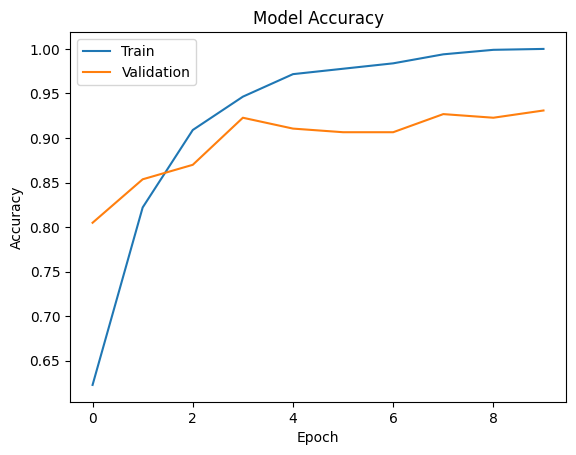

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score

# Define paths
positive_images_path = 'data/positive/images/'
negative_images_path = 'data/negative/images/'

# Define a function to adjust labels
def adjust_labels(data_dir):
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    for subdir in ['positive', 'negative']:
        subdir_path = os.path.join(data_dir, subdir)
        if not os.path.exists(subdir_path):
            continue
        
        for filename in os.listdir(subdir_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                old_path = os.path.join(subdir_path, filename)
                new_label = 'positive' if subdir == 'negative' else 'negative'
                new_path = os.path.join(data_dir, new_label, filename)
                if not os.path.exists(os.path.join(data_dir, new_label)):
                    os.makedirs(os.path.join(data_dir, new_label))
                os.rename(old_path, new_path)

adjust_labels('data')

# Data Augmentation and Preparation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'data/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'data/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the model
model.save('license_plate_model.h5')

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
def evaluate_model(model, validation_generator):
    y_true = validation_generator.classes
    y_pred_prob = model.predict(validation_generator)
    y_pred = (y_pred_prob > 0.5).astype(int)

    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return precision, recall, f1

precision, recall, f1 = evaluate_model(model, validation_generator)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
